<b> In this notebook, i start tabulating the source URLS </b>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

This was the query i used to create the new events_eventmentions dataframe

SELECT 
  events.GLOBALEVENTID, SQLDATE, MonthYear, Actor1Name, Actor1CountryCode, Actor2Name, Actor2CountryCode, EventCode, GoldsteinScale, NumMentions, NumSources, NumArticles, AvgTone, Actor1Geo_FullName, Actor1Geo_CountryCode, Actor2Geo_FullName, Actor2Geo_CountryCode, ActionGeo_FullName, ActionGeo_CountryCode, ActionGeo_ADM1Code, ActionGeo_ADM2Code, SOURCEURL, MentionTimeDate, MentionType, MentionSourceName, MentionIdentifier, SentenceID, Actor1CharOffset, Actor2CharOffset, ActionCharOffset, InRawText, Confidence,	MentionDocLen, MentionDocTone
FROM 
  `gdelt-bq.gdeltv2.eventmentions` as eventmentions join `gdelt-bq.gdeltv2.events` as events 
    ON eventmentions.GLOBALEVENTID = events.GLOBALEVENTID 
WHERE 
  ActionGeo_ADM1Code like 'FM%' -- Micronesia
  OR ActionGeo_ADM1Code like 'FJ%' -- Fiji
  OR ActionGeo_ADM1Code like 'KR%' -- Kiribati
  OR ActionGeo_ADM1Code like 'RM%' -- Marshall Islands
  OR ActionGeo_ADM1Code like 'NR%' -- Nauru
  OR ActionGeo_ADM1Code like 'PS%' -- Palau
  OR ActionGeo_ADM1Code like 'PP%' -- Papua New Guinea
  OR ActionGeo_ADM1Code like 'WS%' -- Samoa
  OR ActionGeo_ADM1Code like 'BP%' -- Solomon Islands
  OR ActionGeo_ADM1Code like 'TN%' -- Tonga
  OR ActionGeo_ADM1Code like 'TV%' -- Tuvalu
  OR ActionGeo_ADM1Code like 'NH%' -- Vanuatu
  OR ActionGeo_ADM1Code like 'CW%' -- Cook Islands
  OR ActionGeo_ADM1Code like 'NE%' -- Niue
  OR ActionGeo_ADM1Code like 'AQ%' -- American Samoa
  OR ActionGeo_FullName = 'Ashmore Reef, Queensland, Australia'
  OR ActionGeo_ADM1Code like 'FQ%' -- Baker Island
  OR ActionGeo_FullName = 'Coral Sea, Oceans (general), Oceans'
  OR ActionGeo_FullName like 'Easter Island, V%'
  OR ActionGeo_FullName = 'Galapagos, Imbabura, Ecuador'
  OR ActionGeo_ADM1Code like 'FP%' -- French Polynesia
  OR ActionGeo_ADM1Code like 'GQ%' -- Guam
  OR ActionGeo_ADM1Code like 'HQ%' -- Howland Island
  OR ActionGeo_ADM1Code like 'DQ%' -- Jarvis Island
  OR ActionGeo_ADM1Code like 'JQ%' -- Johnston Atoll
  OR ActionGeo_ADM1Code like 'KQ%' -- Kingman Reef
  OR ActionGeo_FullName = 'Midway Island, Western Australia, Australia'
  OR ActionGeo_ADM1Code like 'NC%' -- New Caledonia
  OR ActionGeo_ADM1Code like 'NF%' -- Norfold Island
  OR ActionGeo_ADM1Code like 'CQ%' -- Norther Mariana Islands
  OR ActionGeo_FullName = 'Ogasawaramura, Tokyo, Japan'
  OR ActionGeo_ADM1Code like 'LQ%' -- Palmyra Atoll
  OR ActionGeo_ADM1Code = 'ID36' -- Papua, Indonesia
  OR ActionGeo_ADM1Code like 'PC%' -- Pitcairn Islands
  OR ActionGeo_ADM1Code like 'TL%' -- Tokelau
  OR ActionGeo_ADM1Code like 'WQ%' -- Wake Island
  OR ActionGeo_ADM1Code like 'WF%' -- Wallis and Futuna
  OR ActionGeo_ADM1Code = 'ID39' -- West Papua, Indonesia
  OR ActionGeo_FullName = 'Bonin Islands, Tokyo, Japan'

In [3]:
# Read in the data
df = pd.read_csv('C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/Python Programming/events_eventmentions.csv')

In [6]:
# Create the SQL engine 
engine = create_engine('sqlite://', echo=False)
df.to_sql('events_eventmentions', con=engine)

#### Basic info about the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032033 entries, 0 to 3032032
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   GLOBALEVENTID          int64  
 1   SQLDATE                int64  
 2   MonthYear              int64  
 3   Actor1Name             object 
 4   Actor1CountryCode      object 
 5   Actor2Name             object 
 6   Actor2CountryCode      object 
 7   EventCode              int64  
 8   GoldsteinScale         float64
 9   NumMentions            int64  
 10  NumSources             int64  
 11  NumArticles            int64  
 12  AvgTone                float64
 13  Actor1Geo_FullName     object 
 14  Actor1Geo_CountryCode  object 
 15  Actor2Geo_FullName     object 
 16  Actor2Geo_CountryCode  object 
 17  ActionGeo_FullName     object 
 18  ActionGeo_CountryCode  object 
 19  ActionGeo_ADM1Code     object 
 20  ActionGeo_ADM2Code     float64
 21  SOURCEURL              object 
 22  MentionTimeDate   

In [12]:
df.head(10)

,GLOBALEVENTID,SQLDATE,MonthYear,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode,EventCode,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor2Geo_FullName,Actor2Geo_CountryCode,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,SOURCEURL,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone
0,751799390,20180429,201804,NaN,NaN,MINIST,NaN,43,2.8,6,1,6,2.079002,NaN,NaN,"Luganville, Sanma, Vanuatu",NH,"Luganville, Sanma, Vanuatu",NH,NH13,31852.0,http://dailypost.vu/news/pepsi-launches-its-own-disability-association/article_366aa90b-3e79-5aad-becd-1e5e1e3414c8.html,20180429221500,1,dailypost.vu,http://dailypost.vu/news/pepsi-launches-its-own-disability-association/article_366aa90b-3e79-5aad-becd-1e5e1e3414c8.html,7,-1,1580,1671,1,60,2905,2.079002
1,800687885,20181107,201811,CHINESE,CHN,VANUATU,VUT,42,1.9,2,1,2,-1.115538,"Shanghai, Shanghai, China",CH,"Luganville, Sanma, Vanuatu",NH,"Luganville, Sanma, Vanuatu",NH,NH13,31852.0,https://www.strategic-culture.org/news/2018/11/07/hawaiianized-new-caledonia-votes-against-independence.html,20181107101500,1,strategic-culture.org,https://www.strategic-culture.org/news/2018/11/07/hawaiianized-new-caledonia-votes-against-independence.html,23,5286,5352,5431,0,20,7976,-1.115538
2,737184839,20180309,201803,CHINESE,CHN,COMMUNITY,NaN,30,4.0,4,1,4,-3.365385,"Southern Highlands, Southern Highlands, Papua New Guinea",PP,"Southern Highlands, Southern Highlands, Papua New Guinea",PP,"Southern Highlands, Southern Highlands, Papua New Guinea",PP,PP05,18585.0,http://www.xinhuanet.com/english/2018-03/09/c_137027052.htm,20180309074500,1,sina.com,http://english.sina.com/china/d/2018-03-09/detail-ifysayiq6063749.shtml,1,0,38,51,0,40,1300,-3.333333
3,854160156,20190622,201906,PARLIAMENT,NaN,GOVERNOR,NaN,30,4.0,3,1,3,0.000000,"West Sepik Province, Sandaun, Papua New Guinea",PP,"West Sepik Province, Sandaun, Papua New Guinea",PP,"West Sepik Province, Sandaun, Papua New Guinea",PP,PP18,18585.0,https://emtv.com.pg/late-delivery-of-road-machinery-for-sepik-coastal-highway-questioned/,20190622063000,1,emtv.com.pg,https://emtv.com.pg/late-delivery-of-road-machinery-for-sepik-coastal-highway-questioned/,2,411,466,375,1,30,1164,0.000000
4,809092754,20181211,201812,SANTIAGO,CHL,BRITISH,GBR,80,5.0,8,1,8,-1.716738,"Santiago, Regióetropolitana, Chile",CI,"London, London, City of, United Kingdom",UK,"Easter Island, Valparaí, Chile",CI,CI01,149631.0,https://in.reuters.com/article/chile-heritage-statue/easter-island-mayor-concedes-moai-statue-might-be-better-left-in-british-museum-idINKBN1O92KK,20181211003000,1,euronews.com,https://www.euronews.com/2018/12/10/easter-island-mayor-concedes-moai-statue-might-be-better-left-in-british-museum,2,101,193,165,1,100,2575,-1.818182
5,421274085,20150330,201503,PAPUA NEW GUINEA,PNG,AL JAZEERA,QAT,13,0.4,6,1,6,-5.678233,"Rabaul, East New Britain, Papua New Guinea",PP,"Rabaul, East New Britain, Papua New Guinea",PP,"Rabaul, East New Britain, Papua New Guinea",PP,PP10,18585.0,http://theindependentbd.com/index.php?option=com_content&view=article&id=253068:magnitude-75-earthquake-hits-papua-new-guinea-tsunami-warning-issued&catid=187:online-edition&Itemid=223,20150330071500,1,theindependentbd.com,http://theindependentbd.com/index.php?option=com_content&view=article&id=253068:magnitude-75-earthquake-hits-papua-new-guinea-tsunami-warning-issued&catid=187:online-edition&Itemid=223,2,1006,1033,1030,0,60,1858,-5.678233
6,544448780,20160527,201605,FRANCE,FRA,FRENCH POLYNESIA,FRA,20,3.0,2,1,2,0.000000,"Paris, France (general), France",FR,French Polynesia,FP,French Polynesia,FP,FP,NaN,http://www.radionz.co.nz/international/pacific-news/304973/tahiti-says-forum-bid-on-good-track,20160527001500,1,radionz.co.nz,http://www.radionz.co.nz/international/pacific-news/304973/tahiti-says-forum-bid-on

#### This a correlation matrix of some of the integer and floating point variables that show positive and negative correlation
This is a good place to start looking to see if there are any two variables that have a positive or negative correlation. I filtered out many of the numeric variables that are not useful like:
GLOBALEVENTID, SQLDATE, MonthYear, MentionTimeDate, MentionType, InRawText, ActionGeo_ADM2Code


In [20]:
corr_df = df[['GoldsteinScale','NumMentions','NumSources','NumArticles','AvgTone','SentenceID','Actor1CharOffset','Actor2CharOffset','ActionCharOffset','Confidence','MentionDocLen','MentionDocTone']].corr()
corr_df.round(decimals = 2)

,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,Confidence,MentionDocLen,MentionDocTone
GoldsteinScale,1.00,-0.03,-0.05,-0.03,0.31,-0.00,0.00,0.03,0.01,0.00,0.00,0.31
NumMentions,-0.03,1.00,0.74,0.99,-0.09,0.02,0.00,-0.00,0.00,0.30,0.00,-0.08
NumSources,-0.05,0.74,1.00,0.75,-0.12,0.04,0.02,0.03,0.02,-0.03,0.02,-0.11
NumArticles,-0.03,0.99,0.75,1.00,-0.09,0.01,-0.00,-0.01,-0.00,0.29,-0.00,-0.08
AvgTone,0.31,-0.09,-0.12,-0.09,1.00,-0.05,-0.03,-0.02,-0.02,0.02,-0.02,0.96
SentenceID,-0.00,0.02,0.04,0.01,-0.05,1.00,0.80,0.64,0.90,-0.06,0.80,-0.05
Actor1CharOffset,0.00,0.00,0.02,-0.00,-0.03,0.80,1.00,0.46,0.88,-0.07,0.70,-0.03
Actor2CharOffset,0.03,-0.00,0.03,-0.01,-0.02,0.64,0.46,1.00,0.69,-0.09,0.54,-0.02
ActionCharOffset,0.01,0.00,0.02,-0.00,-0.02,0.90,0.88,0.69,1.00,-0.05,0.79,-0.02
Confidence,0.00,0.30,-0.03,0.29,0.02,-0.06,-0.07,-0.09,-0.05,1.00,-0.05,0.02


The positive/negative correlations between numeric variables are:
NumArticles	& NumMentions -> 0.99
NumArticles	& NumSources -> 0.75
Confidence & NumArticles -> 0.29 (not that high but worth mentioning)
AvgTone & MentionDocTone -> 0.96
SentenceID & Actor1CharOffset -> 0.8
SentenceID & Actor2CharOffset -> 0.64
SentenceID & ActionCharOffset -> 0.90
MentionDocLen & SentenceID -> 0.8

In [21]:
# Gives us basic summary statistics of each correlations for the columns
corr_df.describe().round(decimals=2)

,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,Confidence,MentionDocLen,MentionDocTone
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,0.13,0.24,0.19,0.24,0.15,0.34,0.31,0.27,0.35,0.11,0.31,0.16
std,0.30,0.42,0.39,0.42,0.40,0.44,0.42,0.37,0.45,0.31,0.41,0.40
min,-0.05,-0.09,-0.12,-0.09,-0.12,-0.06,-0.07,-0.09,-0.05,-0.09,-0.05,-0.11
25%,-0.01,-0.01,-0.04,-0.01,-0.06,-0.01,-0.01,-0.01,-0.01,-0.06,-0.01,-0.06
50%,0.00,0.00,0.02,-0.00,-0.02,0.03,0.01,0.03,0.02,-0.01,0.01,-0.02
75%,0.10,0.41,0.22,0.41,0.09,0.80,0.73,0.56,0.82,0.09,0.73,0.09
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## For each SourceURL, what are the number of mentions associated with it?

In [26]:
query = """
SELECT SOURCEURL, count(MentionIdentifier) as count
FROM events_eventmentions
GROUP BY SOURCEURL
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['SOURCEURL','count'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the top 20 results
result_df.head(20)

,SOURCEURL,count
0,http://bigstory.ap.org/article/3b753d6b5e5e4a5fa192f01caec348cd/latest-prince-charles-climate-envoys-focus-forests,20693
1,https://961srs.iheart.com/content/2018-10-08-meghan-markles-estranged-half-sister-turned-away-by-kensington-palace/,6007
2,http://www.bozemandailychronicle.com/ap_news/us/q-a-what-does-the-us-military-do-on-the/article_2a339571-bfbb-55d1-97b6-12ba20c9ec94.html,3748
3,https://www.680news.com/2019/08/08/guams-catholics-reckon-with-decades-of-horrific-sex-abuse/,3600
4,https://www.washingtontimes.com/news/2020/aug/4/3-men-rescued-from-pacific-island-after-writing-so/,3247
5,http://www.wacotrib.com/news/ap_nation/politics/guam-s-residents-feel-us-patriotism-but-growing-concern/article_bda35a95-a18c-512b-a0c4-49996ab634d0.html,3118
6,http://www.kiro7.com/news/politics/guam-residents-fear-attack-after-north-korea-statements/585955093,2657
7,http://helenair.com/news/world/the-latest-rouhani-says-not-important-who-wins-us-election/article_01c89581-457c-5c73-a8a5-2fa9e17e21e5.html,2548
8,https://www.news.com.au/world/pacific/china-almost-has-australia-surrounded-but-its-debttrap-diplomacy-has-been-exposed/news-story/3f8d390e8c8e3b5158214836ee412aee,2468
9,http://hosted.ap.org/dynamic/stories/U/US_MED_ZIKA_VIRUS_PREGNANT_WOMEN?SITE=AP&SECTION=HOME&TEMPLATE=DEFAULT&CTIME=2016-02-26-14-21-51,2434


###### This result shows the sourceURL from the events tables and the number of follow-up articles (mentions) it has from the eventmentions table

## What are the news sources with the smallest average document length?

In [45]:
query = """
SELECT MentionSourceName, AVG(MentionDocLen)
FROM events_eventmentions
GROUP BY MentionSourceName
ORDER BY AVG(MentionDocLen) ASC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['MentionSourceName','AVG_Length'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the top 20 results
result_df.head(20)

,MentionSourceName,AVG_Length
0,newsregister.com,106.0
1,nieuws.be,152.0
2,justhelicopters.com,173.0
3,shinetv.co.nz,181.0
4,702.co.za,185.0
5,communityni.org,197.0
6,novaguide.gr,222.3
7,mfa.gr,228.0
8,globalcompetitionreview.com,230.0
9,9now.com.au,234.6


###### How many of these news sources are there?

In [47]:
result_df.count()

MentionSourceName    21371
AVG_Length           21372
dtype: int64

There are 21371 news sources and it looks like 1 null news source because AVG_Length is 21372

#### Get some basic summary stats off of the MentionDocLen to help us with our next problem

In [37]:
df['MentionDocLen'].describe().round(decimals=2)

count    3032033.00
mean        4184.89
std         6823.85
min           48.00
25%         1952.00
50%         3101.00
75%         4820.00
max       492895.00
Name: MentionDocLen, dtype: float64

<AxesSubplot:>

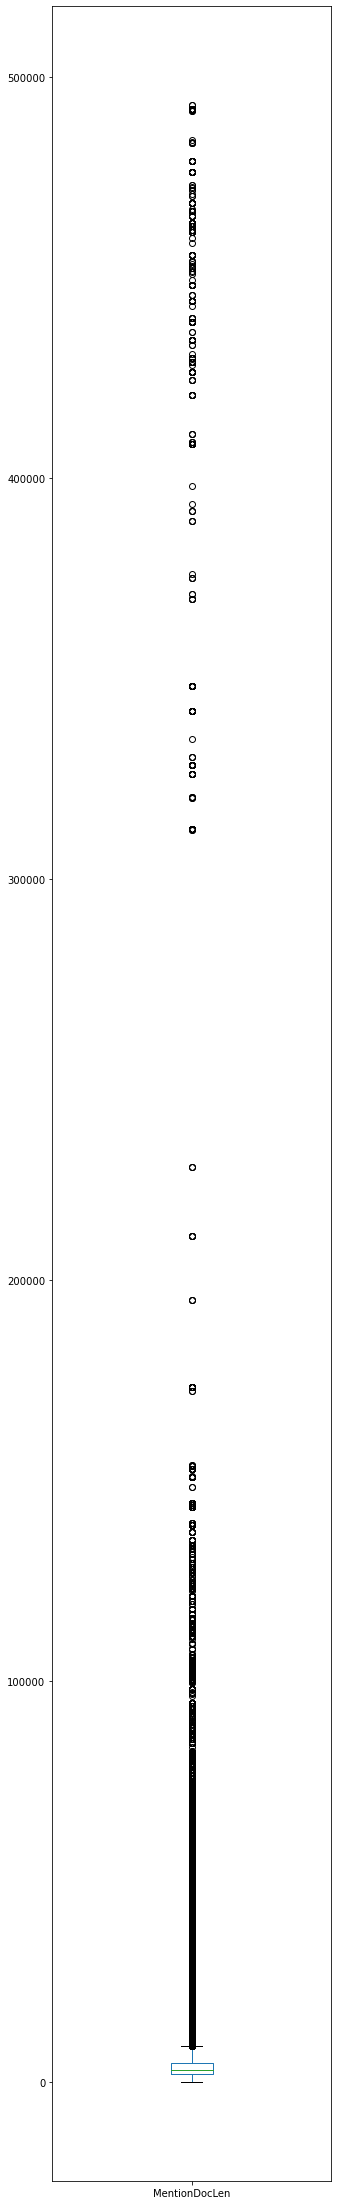

In [81]:
df['MentionDocLen'].plot(kind ='box', figsize=(5,40))

It looks like we have a lot of extreme values. Lets chop off the everything above 10000 words and see what happens

<AxesSubplot:>

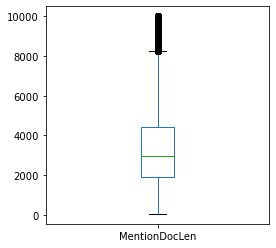

In [71]:
df['MentionDocLen'][df['MentionDocLen'] < 10000].plot(kind ='box', figsize =(4,4))

Lets try a different visualization for a better representation

<AxesSubplot:ylabel='Frequency'>

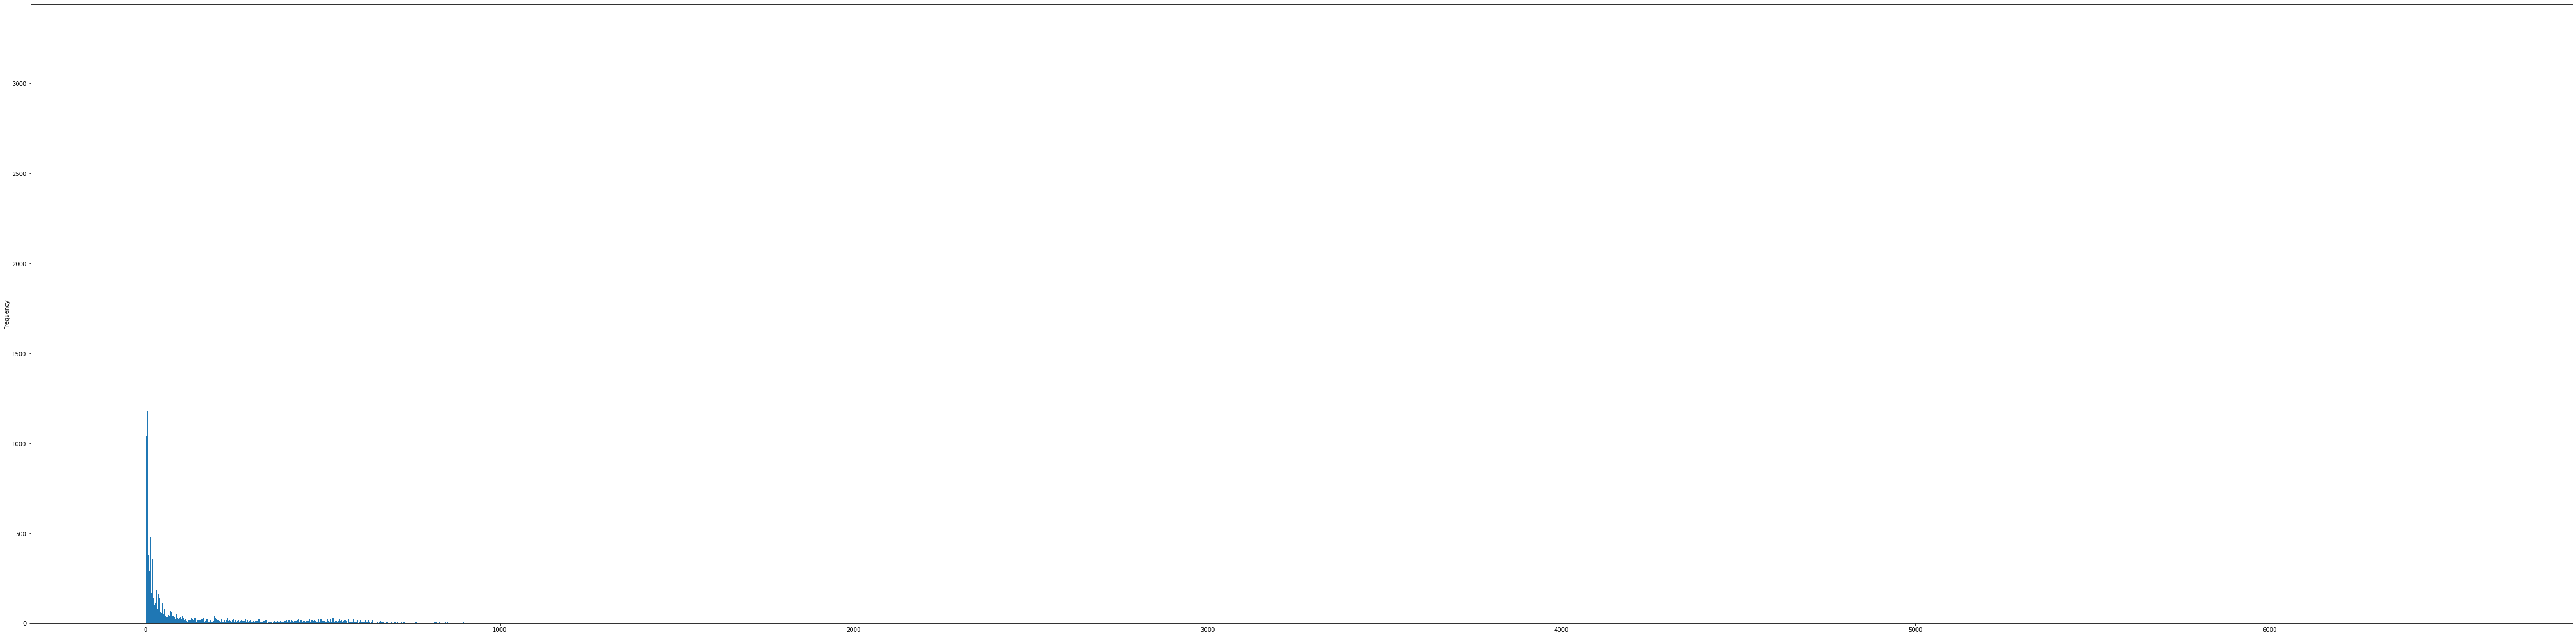

In [92]:
df['MentionDocLen'].value_counts().plot(kind='hist', figsize =(80,20), bins=5000)


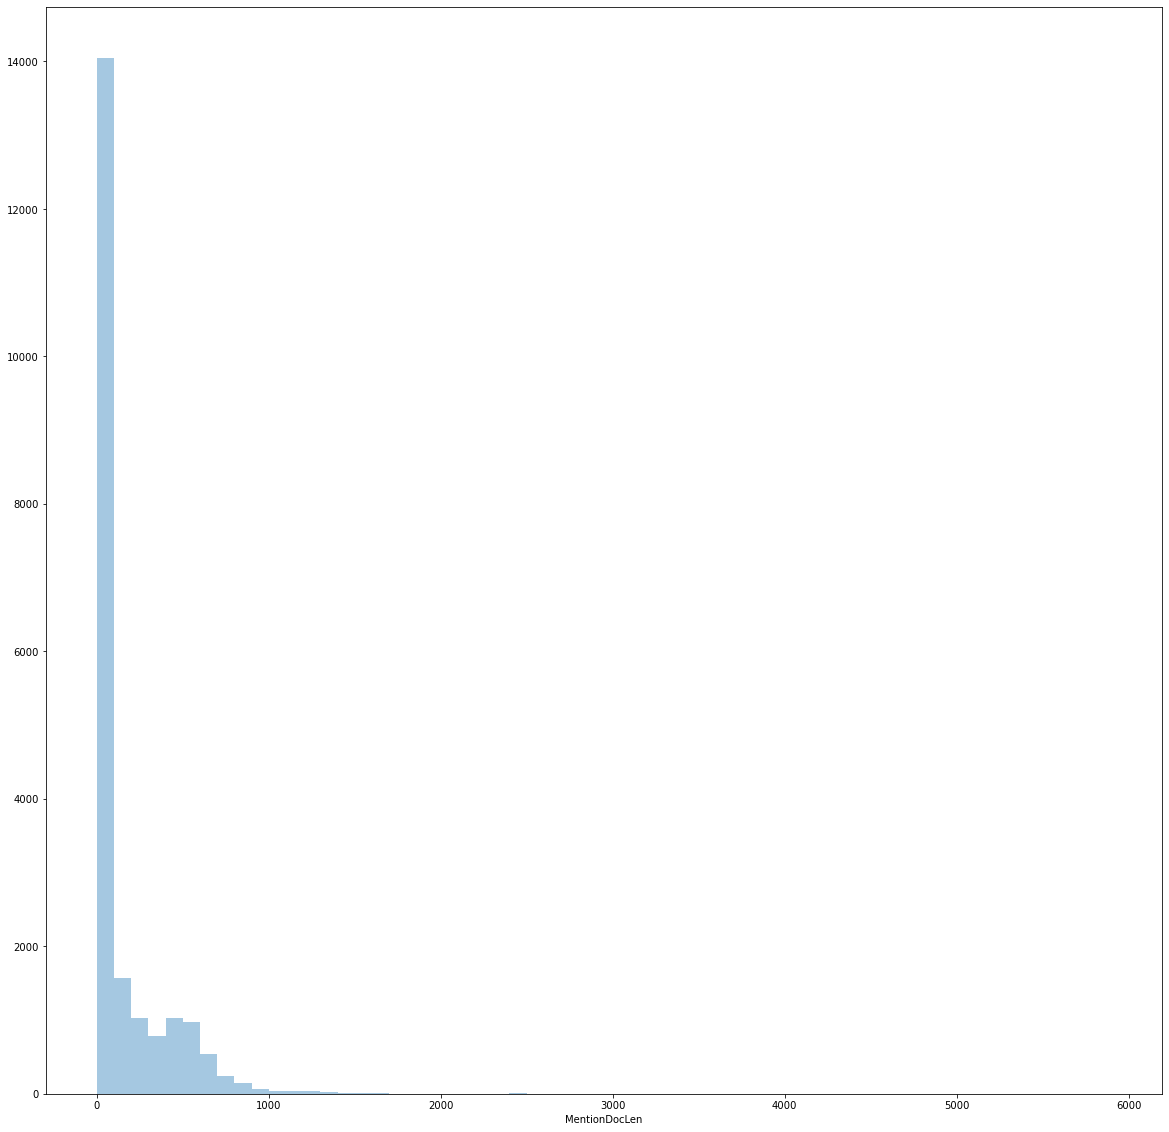

In [90]:
sns.distplot(df['MentionDocLen'].value_counts(), kde=False, bins=list(range(0,6000,100)))
plt.rcParams['figure.figsize'] = (20.0, 20.0)

Kind of looks like there are a lot of articles that are less than 100 words. It's hard to see, but each bin is 100.

### Average confidence level with articles with less than 100 characters by URL?

In [93]:
query = """
SELECT MentionSourceName, AVG(Confidence)
FROM events_eventmentions
GROUP BY MentionSourceName
HAVING AVG(Confidence) < 100
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['MentionSourceName','AVG(Confidence)'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the top 20 results
result_df.head(20)

,MentionSourceName,AVG(Confidence)
0,<NA>,53.214286
1,02elf.net,22.857143
2,06880danwoog.com,60.000000
3,10.tv,90.000000
4,1005freshradio.ca,55.769231
5,1007sandiego.com,52.727273
6,1009theeagle.com,30.000000
7,100freeclassifieds.com,63.846154
8,100milefreepress.net,30.000000
9,100percentfedup.com,20.000000


### How many sources are there that have an average length length less than the Quartile 1?

In [43]:
query = """
SELECT count(MentionSourceName) as count from
(SELECT MentionSourceName, AVG(MentionDocLen) as avg
FROM events_eventmentions
GROUP BY MentionSourceName
HAVING avg < 1952) as t1
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['count'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the top 20 results
result_df.head(20)

,count
0,4066


# What number should be our cutoff using document length?